With leapfrog time stepping:


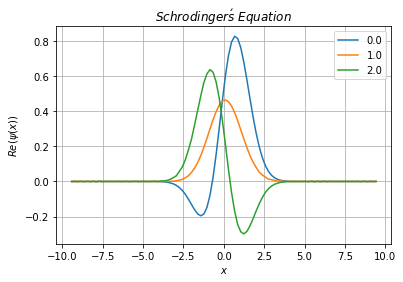

In [16]:
import matplotlib.pyplot as plt
from numpy import *
def f(x):
    return pi**-0.25*2**-0.5*exp(-x**2/2)*(1+2**0.5*x)
n=100
l=6*pi
dt=0.00001
i=complex(0.0, 1.0)
tf=2
x=linspace(-l/2, l/2, n)
y=f(x)
yt=fft.fft(y, n)
# kx_p=linspace(0,n//2,n//2+1)
# kx_n=linspace(-n//2+1,-1,n//2-1)
# k=concatenate((kx_p,kx_n))*(2*pi/l)
k=fft.fftfreq(n, l/(2*pi*n))
a=2*pi/l

t=0.0
mark=0.0
ytprev=zeros(yt.shape)
v=V(x)

ytprev, yt=yt, yt*exp(-1j*k*k*dt)-1j*(2*dt)*fft.fft(v*yt,n)*exp(-0.5j*k*k*dt)
def V(x):
    return 0.5*x*x

while(t<=tf+dt/2):
    y=fft.ifft(yt)
    ytprev, yt = yt, ytprev*exp(-1j*k*k*dt)-1j*(2*dt)*fft.fft(v*y,n)*exp(-0.5j*k*k*dt)
    if(t+dt/2.0>mark):
        y=fft.ifft(yt)
        plt.plot(x, real(y), label=round(mark,2))
        mark+=1
    t+=dt
plt.legend(loc=0)
plt.title(r'$Schrodinger\'s\ Equation$')
plt.grid()
plt.ylabel(r'$Re(\psi(x))$')
plt.xlabel(r'$x$')
plt.show()